<a href="https://colab.research.google.com/github/Sriharish19/EDA-Hotel-Booking-Capstone-Project-1/blob/main/SH_Hotel_Booking_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data frame reading
df=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')
df1=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

In [ ]:
# head
df.head(15)

In [ ]:
# tail
df.tail()

In [ ]:
# shape
df.shape

In [ ]:
# info
df.info()

In [ ]:
# Summary of the data set
df.describe(include= 'all')

In [ ]:
# All the columns of the data set

columns = list(df.columns)
columns

In [ ]:
# Numerical variables

numeric_var = df.describe().columns.tolist()
print(len(numeric_var))
print(numeric_var)

In [ ]:
# Categorical variables

categorical_var = [var for var in df.columns if var not in df.describe().columns]
print(len(categorical_var))
print(categorical_var)

In [ ]:
# Checking for Nan values

# Counting the total Null values in each columns
count = df1.isnull().sum()

#Percentage of total null values in each columns
percentage = round(count/df1.isnull().count(),4) *100

#concating the count and percentage
df_temp = pd.concat([count,percentage], axis = 1, keys = ['Null_count', 'Null_percent']).reset_index()
df_temp

In [ ]:
# DATA CLEANING - removing null values 

df['children'] = df['children'].replace(np.nan, 0)
df['country'] = df['country'].replace(np.nan, 'no country')
df['agent'] = df['agent'].replace(np.nan, 0)
df.drop('company',axis=1,inplace=True)

#changing children column to int type
df["children"]=df["children"].astype(int)

In [ ]:
#Function to convert month_name to month_number

def num_month(month_name):
  m=['January','February','March','April','May','June','July','August','September','October','November','December']
  n=['01','02','03','04','05','06','07','08','09','10','11','12']
  return(n[m.index(month_name)])

#Function to convert single_digit_date to double_digit_date

def date_two_digit(single_digit_date):
  if single_digit_date<10:
    c=[1,2,3,4,5,6,7,8,9]
    d=['01','02','03','04','05','06','07','08','09']
    return(d[c.index(single_digit_date)])
  else:
    return(single_digit_date)

In [ ]:
#Applying num_month function to df
df['month_num'] = df['arrival_date_month'].apply(num_month)

#Applying date_two_digit function to df
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].apply(date_two_digit)

#Assigning month_num to arrival_date_month
df['arrival_date_month'] = df['month_num']

#droping month_num
df.drop(['month_num'], axis = 1, inplace = True)

In [ ]:
#Concating columns to get date in str format
df['date_'] = df['arrival_date_year'].astype(str)+ '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str) 

#Converting the date from str to DATE format 
df['date'] = pd.to_datetime(df.date_)

#droping temporary column
df.drop(['date_'], axis = 1,inplace=True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,0,342,2015,07,27,01,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,07,27,01,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,07,27,01,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,07,27,01,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,07,27,01,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [ ]:
df.shape

(119390, 32)

In [ ]:
# Counting the number of categories in categorial varibales
# Categorical variables
categorical_var = [var for var in df.columns if var not in df.describe().columns]
categorical_var_value = [var for var in categorical_var if var not in ('reservation_status_date')]
for var in categorical_var_value:
  print(df[var].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
08    13877
07    12661
05    11791
10    11160
04    11089
06    10939
09    10508
03     9794
02     8068
11     6794
12     6780
01     5929
Name: arrival_date_month, dtype: int64
17    4406
05    4317
15    4196
25    4160
26    4147
09    4096
12    4087
16    4078
02    4055
19    4052
20    4032
18    4002
24    3993
28    3946
08    3921
03    3855
30    3853
06    3833
14    3819
27    3802
21    3767
04    3763
13    3745
07    3665
01    3626
23    3616
11    3599
22    3596
29    3580
10    3575
31    2208
Name: arrival_date_day_of_month, dtype: int64
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64
Online TA        56477
Offline TA/TO    24219
Groups    

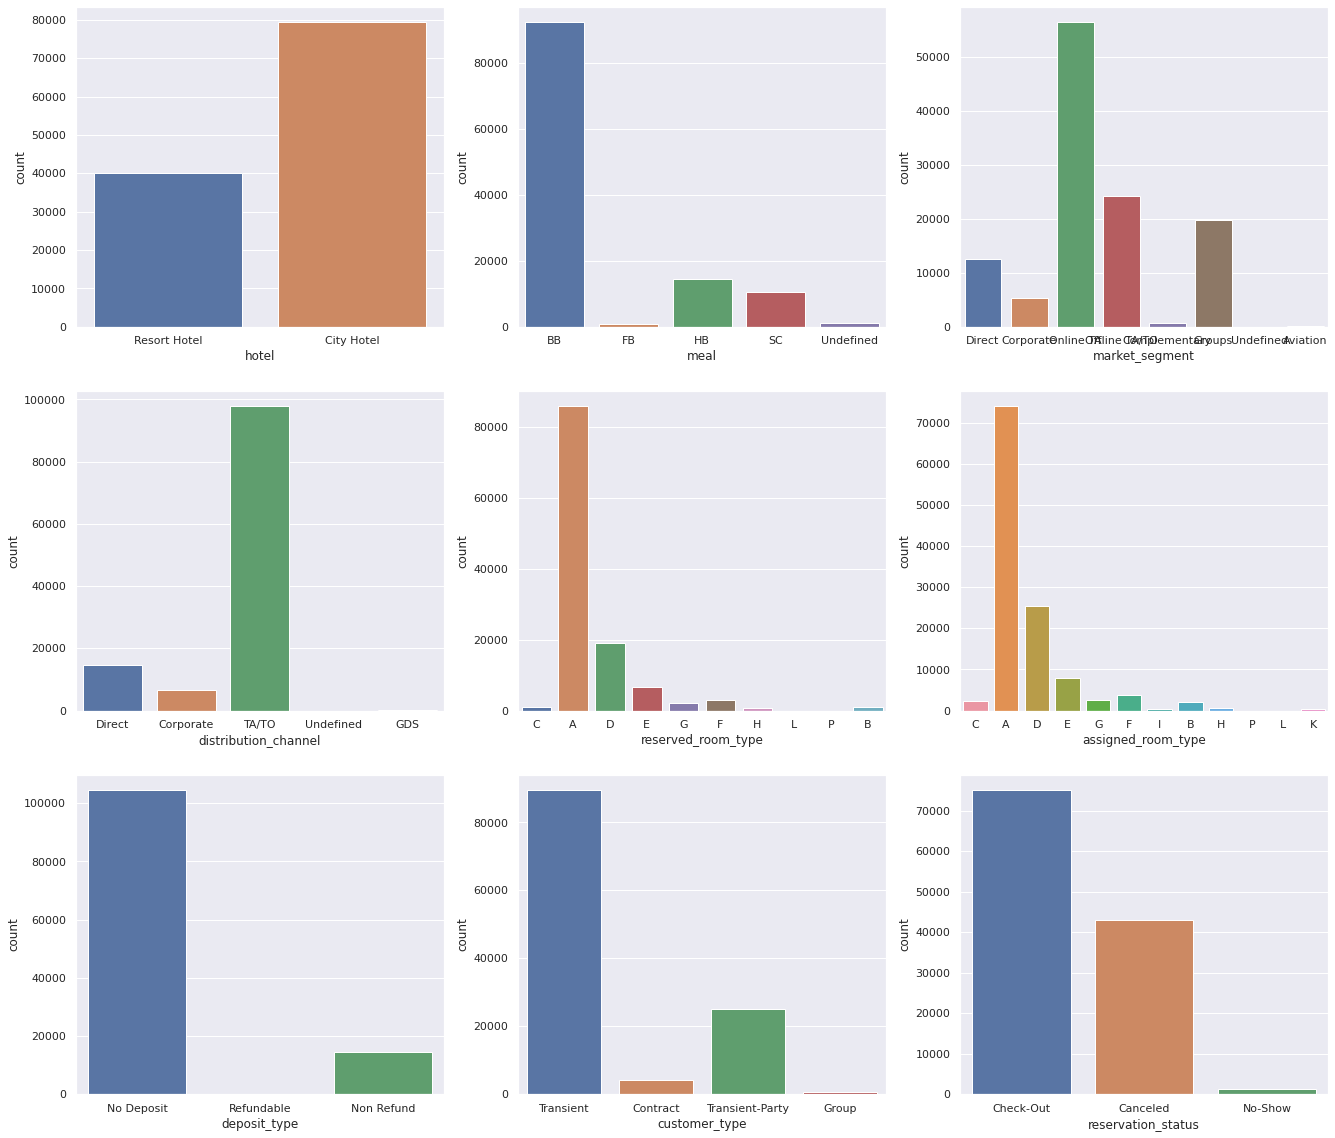

In [ ]:
# Count plot for Categorical variables
lst_count = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
plt.figure(figsize = (20,20))
sns.set_theme()
for i in enumerate(lst_count):
    plt.subplot(3, 3,i[0]+1)
    sns.countplot(data = df, x = df[i[1]])

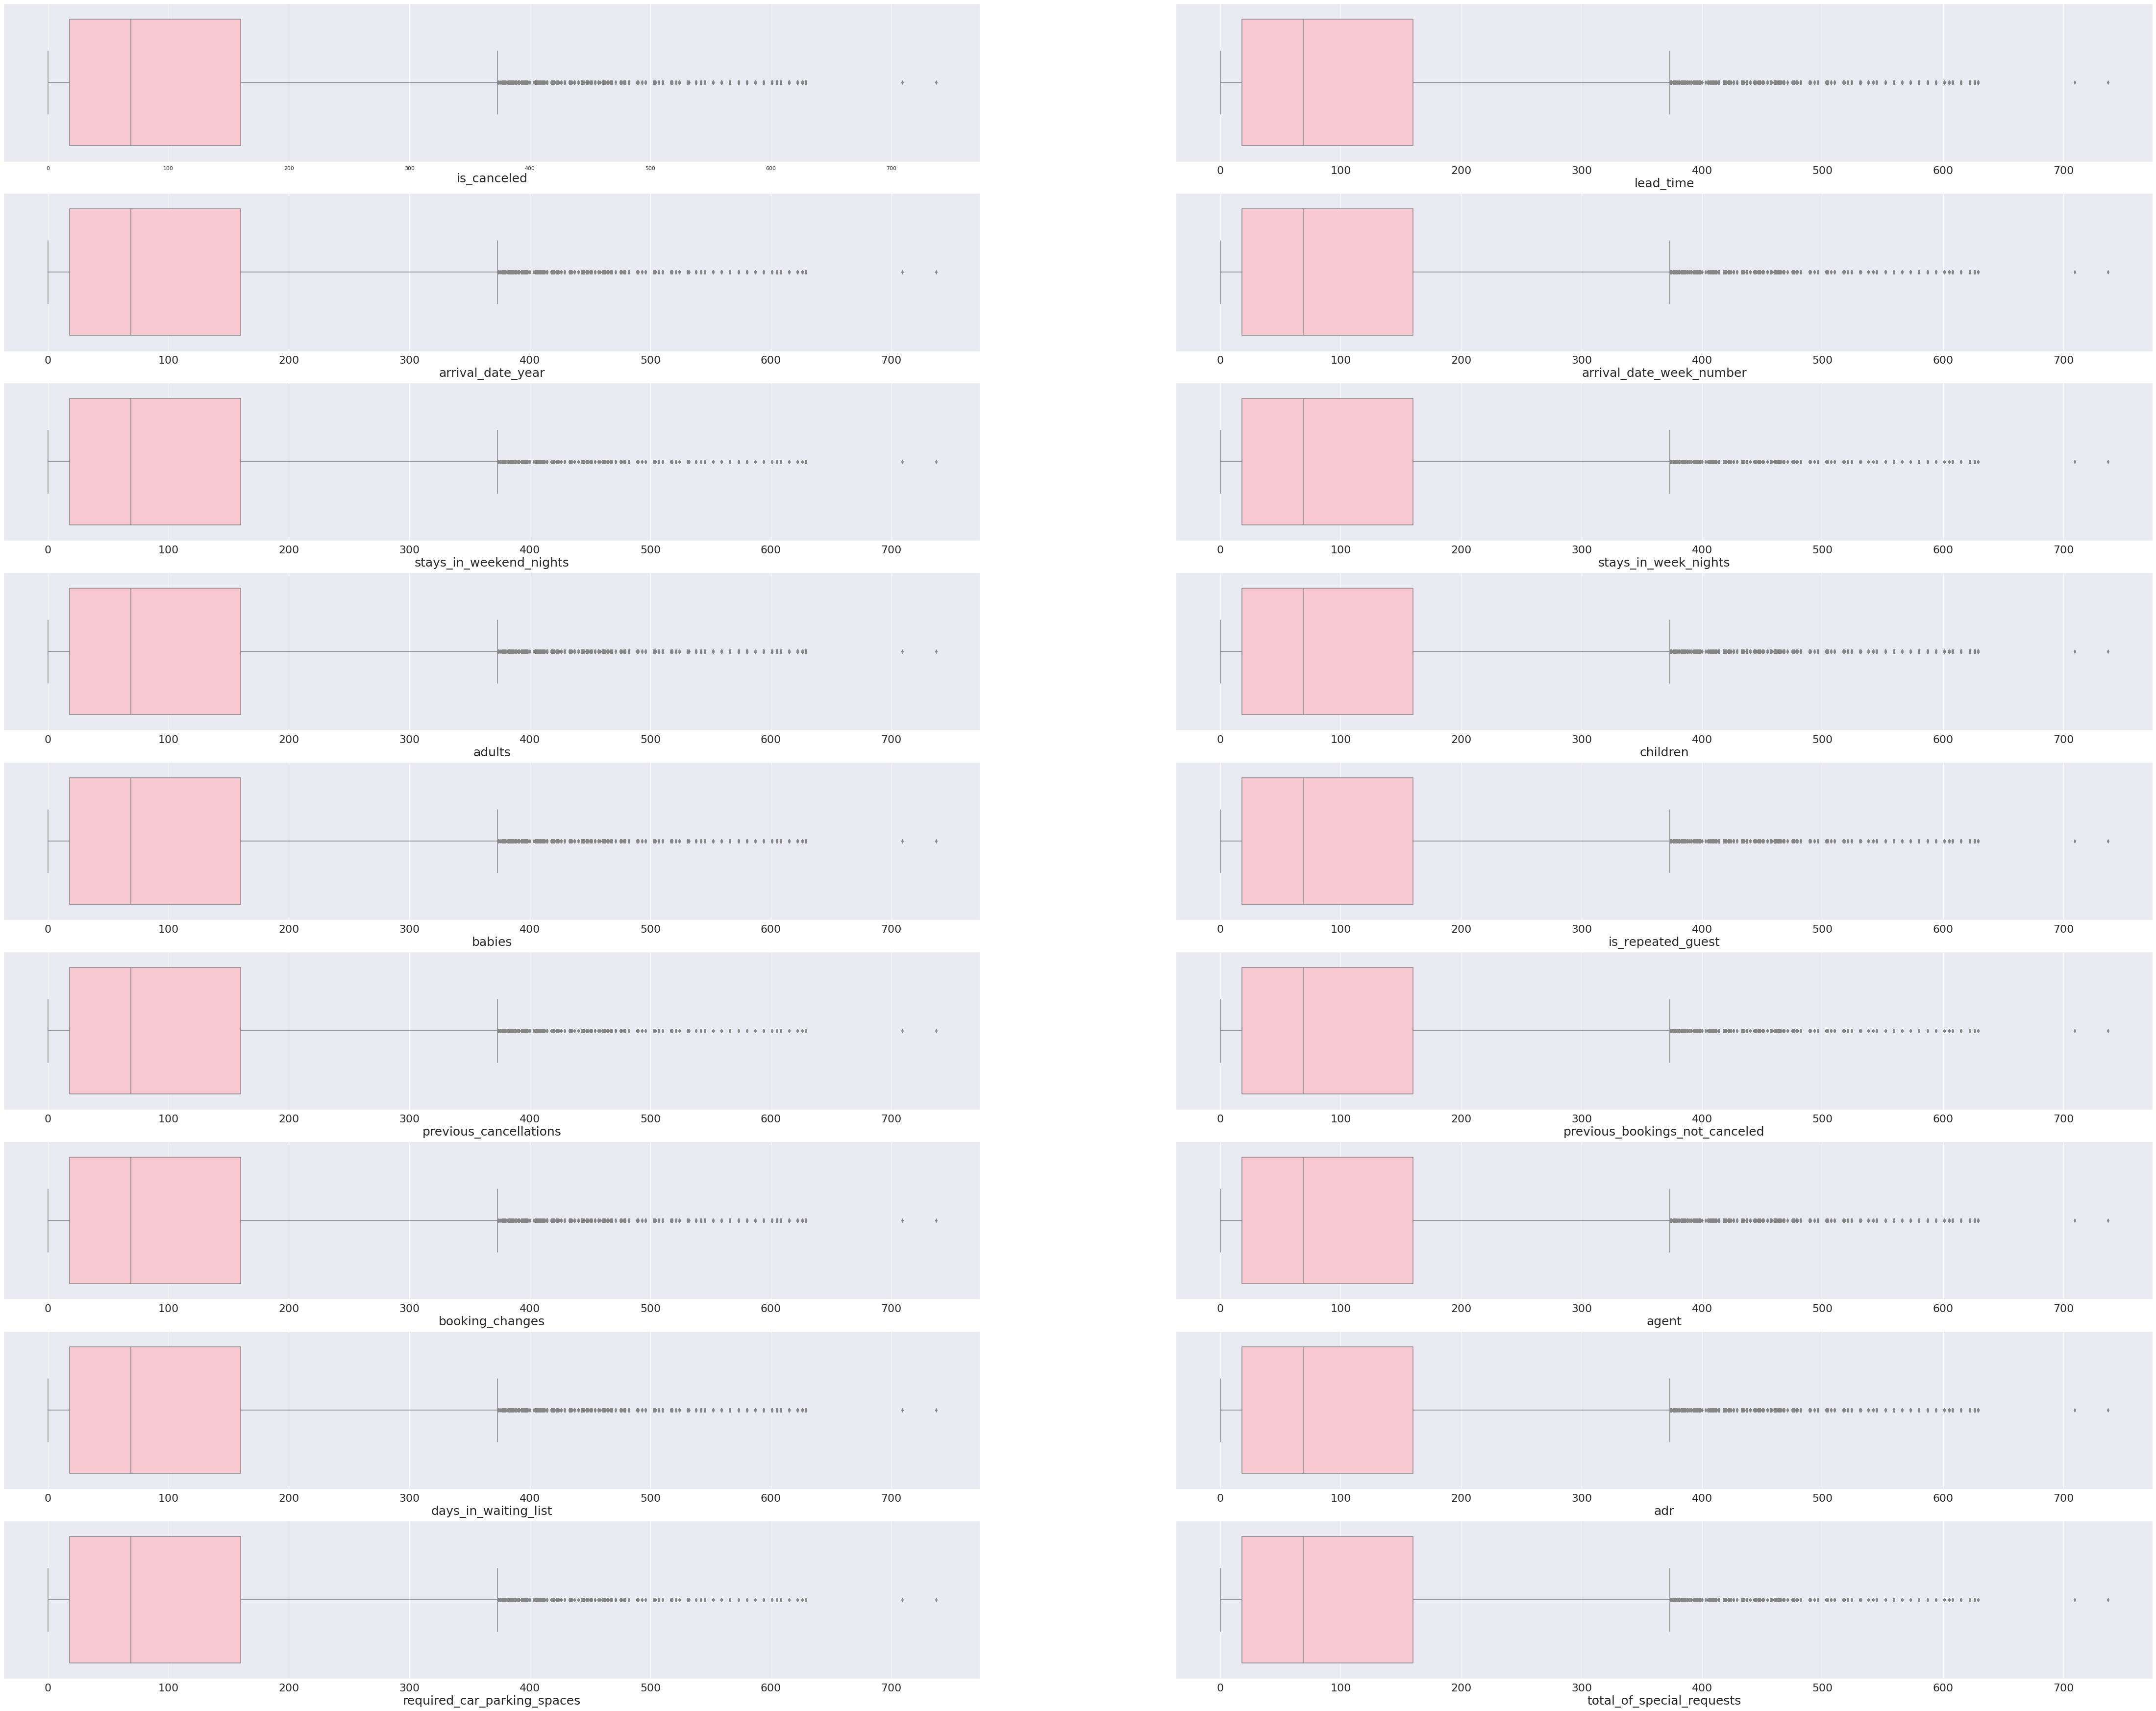

In [ ]:
# Box plot to detect the outliers
lst_box = list(df.describe().columns)
plt.figure(figsize = (70,70))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(10, 2,i[0]+1)
    sns.set(font_scale = 2)
    sns.boxplot(df["lead_time"],color='pink')
    plt.xlabel(i[1],fontsize=25)

In [ ]:
# Outliers
# Outliers treatment by replacing the outliers with median
lst = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','agent','adr','total_of_special_requests']
for i in lst:
  quantile1,quantile3 = np.percentile(df[i],[25,75])
  # print('Quantile1:',quantile1)
  # print('Quantile3:',quantile3)
  iqr = quantile3 - quantile1
  # print('IQR:',iqr)
  lower_bound_val = quantile1 - (1.5 * iqr)
  upper_bound_val = quantile3 + (1.5 * iqr)
  # print(i+'_Lower Bound:',lower_bound_val)
  print(i+'_Upper Bound:',upper_bound_val)
  df[i] = df[i].apply(lambda x: df[i].median() if x > upper_bound_val else x)

lead_time_Upper Bound: 373.0
stays_in_weekend_nights_Upper Bound: 5.0
stays_in_week_nights_Upper Bound: 6.0
adults_Upper Bound: 2.0
agent_Upper Bound: 369.5
adr_Upper Bound: 211.065
total_of_special_requests_Upper Bound: 2.5


In [ ]:
# Box plot between Reserved room types and adr 
df_not_cancelled = df[df['is_canceled'] == 0]
px.box(data_frame = df_not_cancelled, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')
# Average price per room based on the type

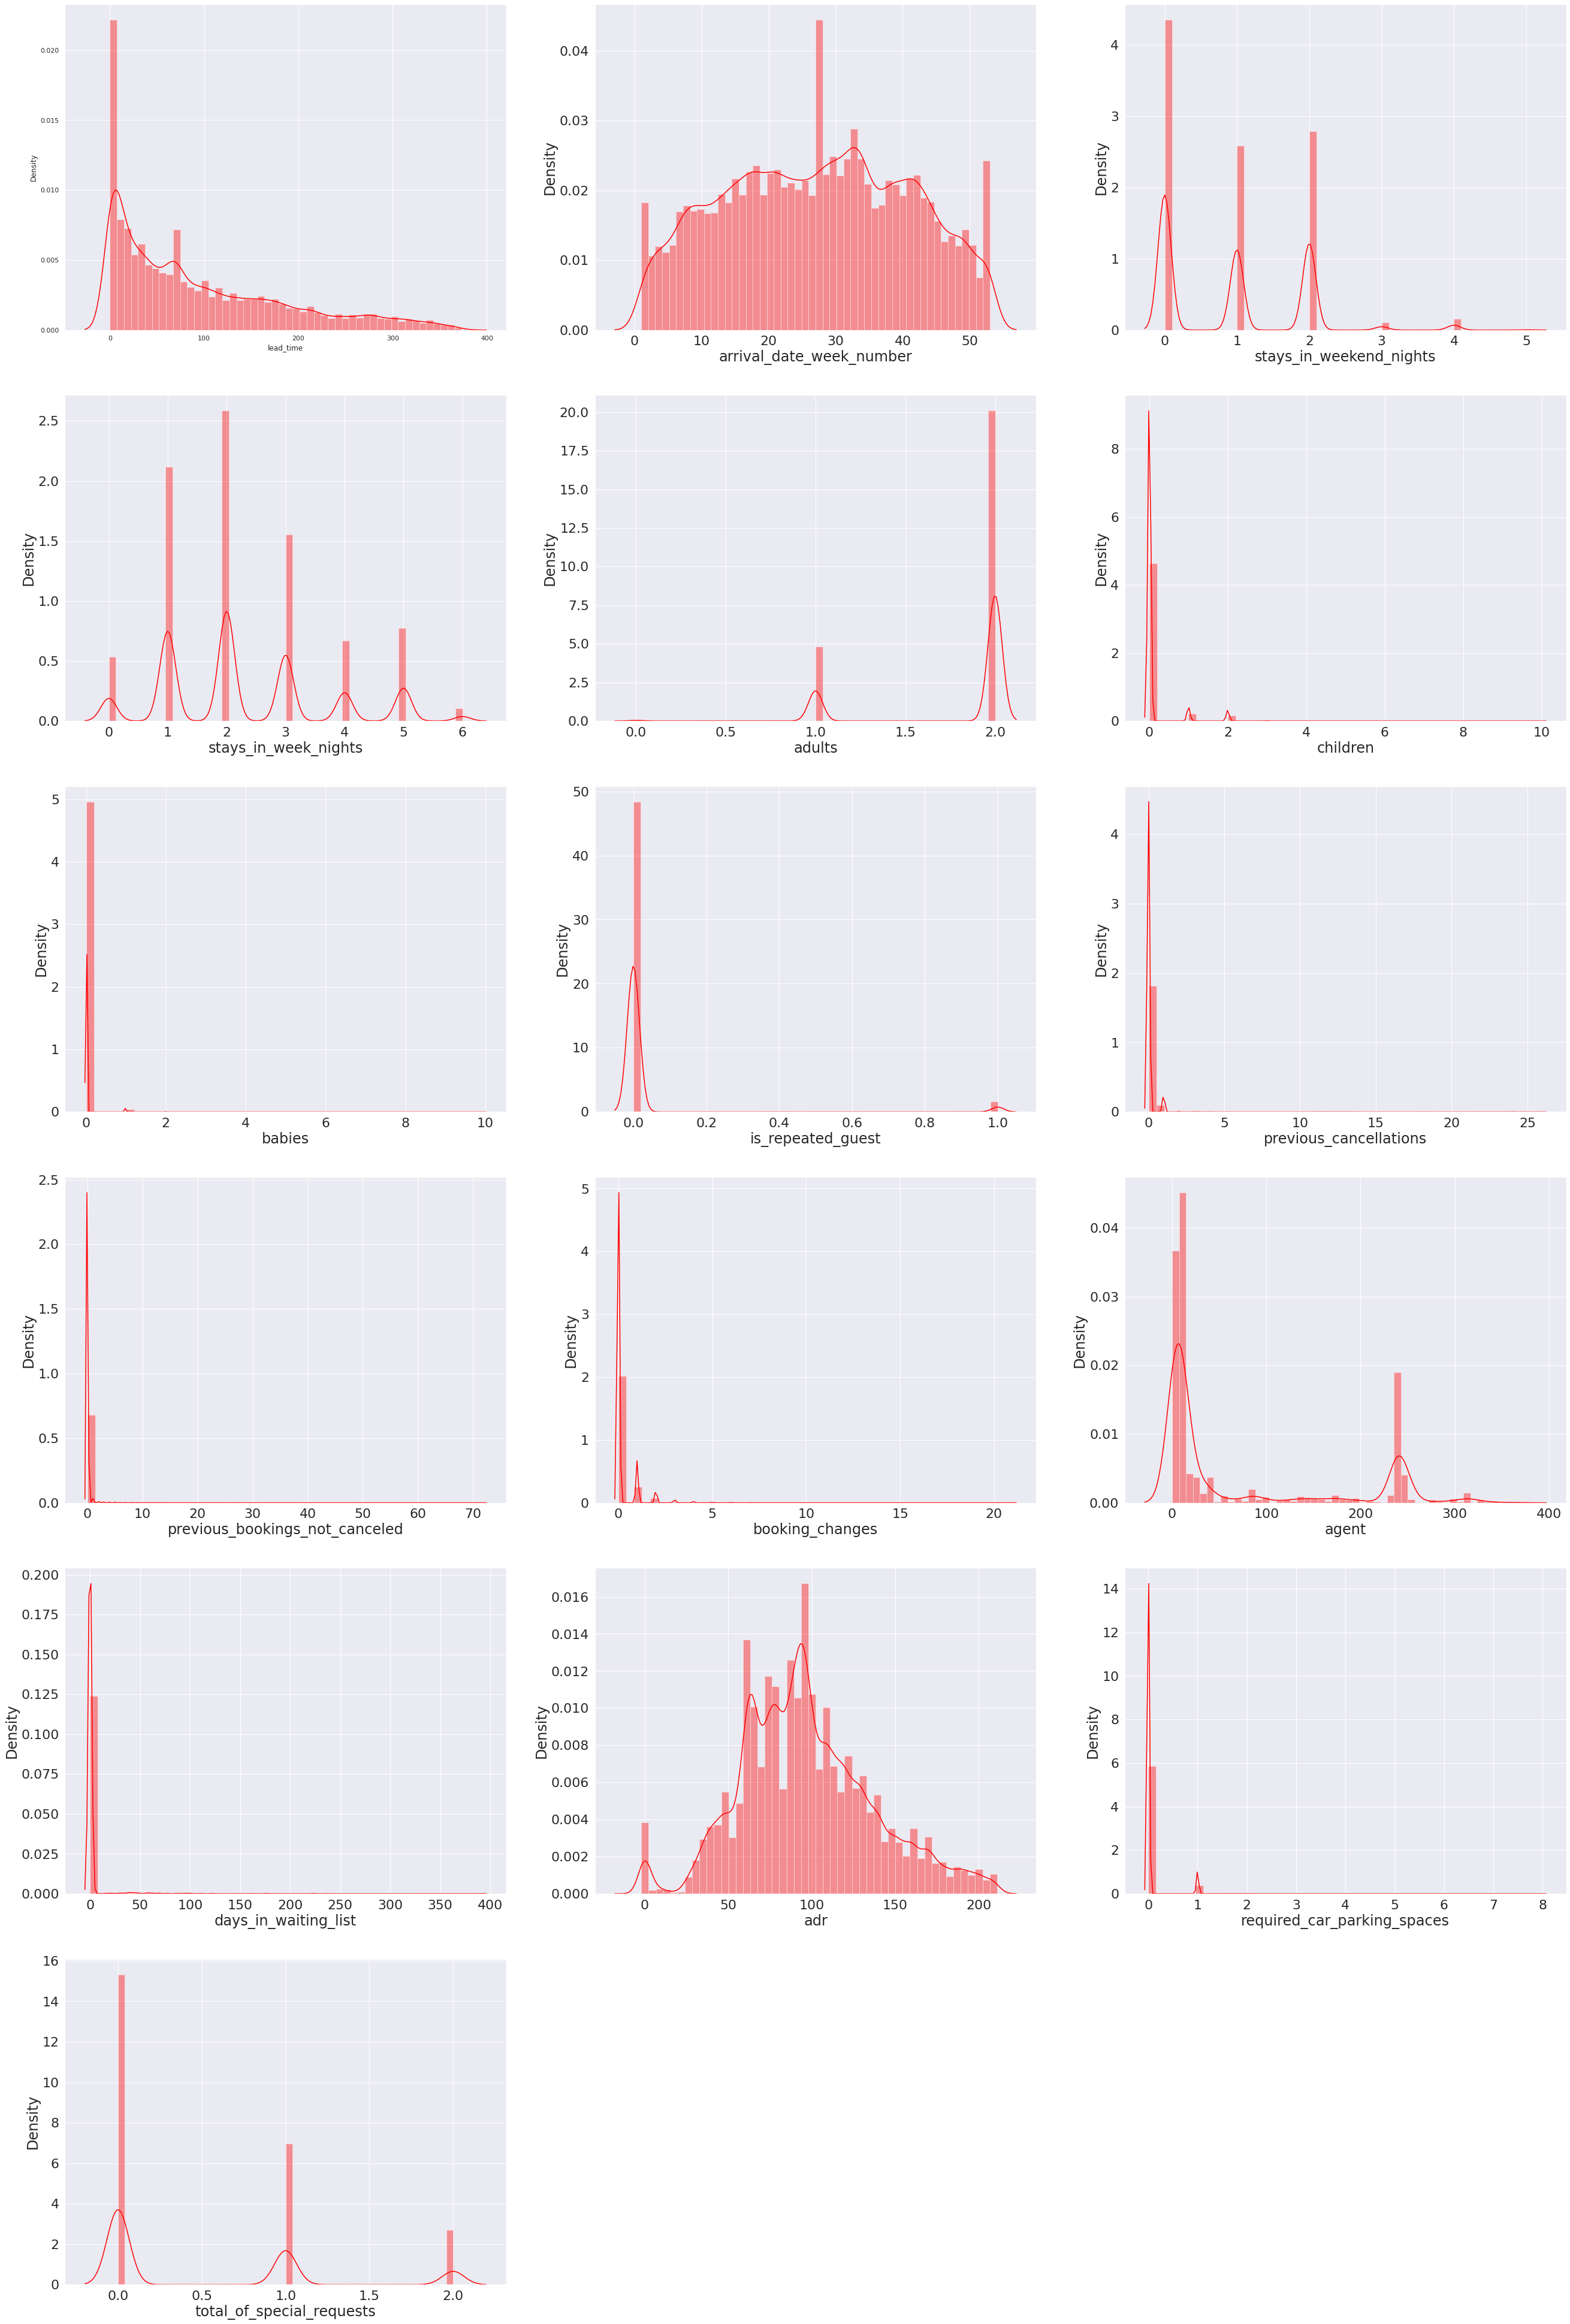

In [ ]:
# Distribution plot for numerical variables
lst_dist = ['lead_time',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests']
plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_dist):
    plt.subplot(6, 3,i[0]+1)
    sns.set(font_scale = 2)
    sns.distplot(df[i[1]],color = 'Red')

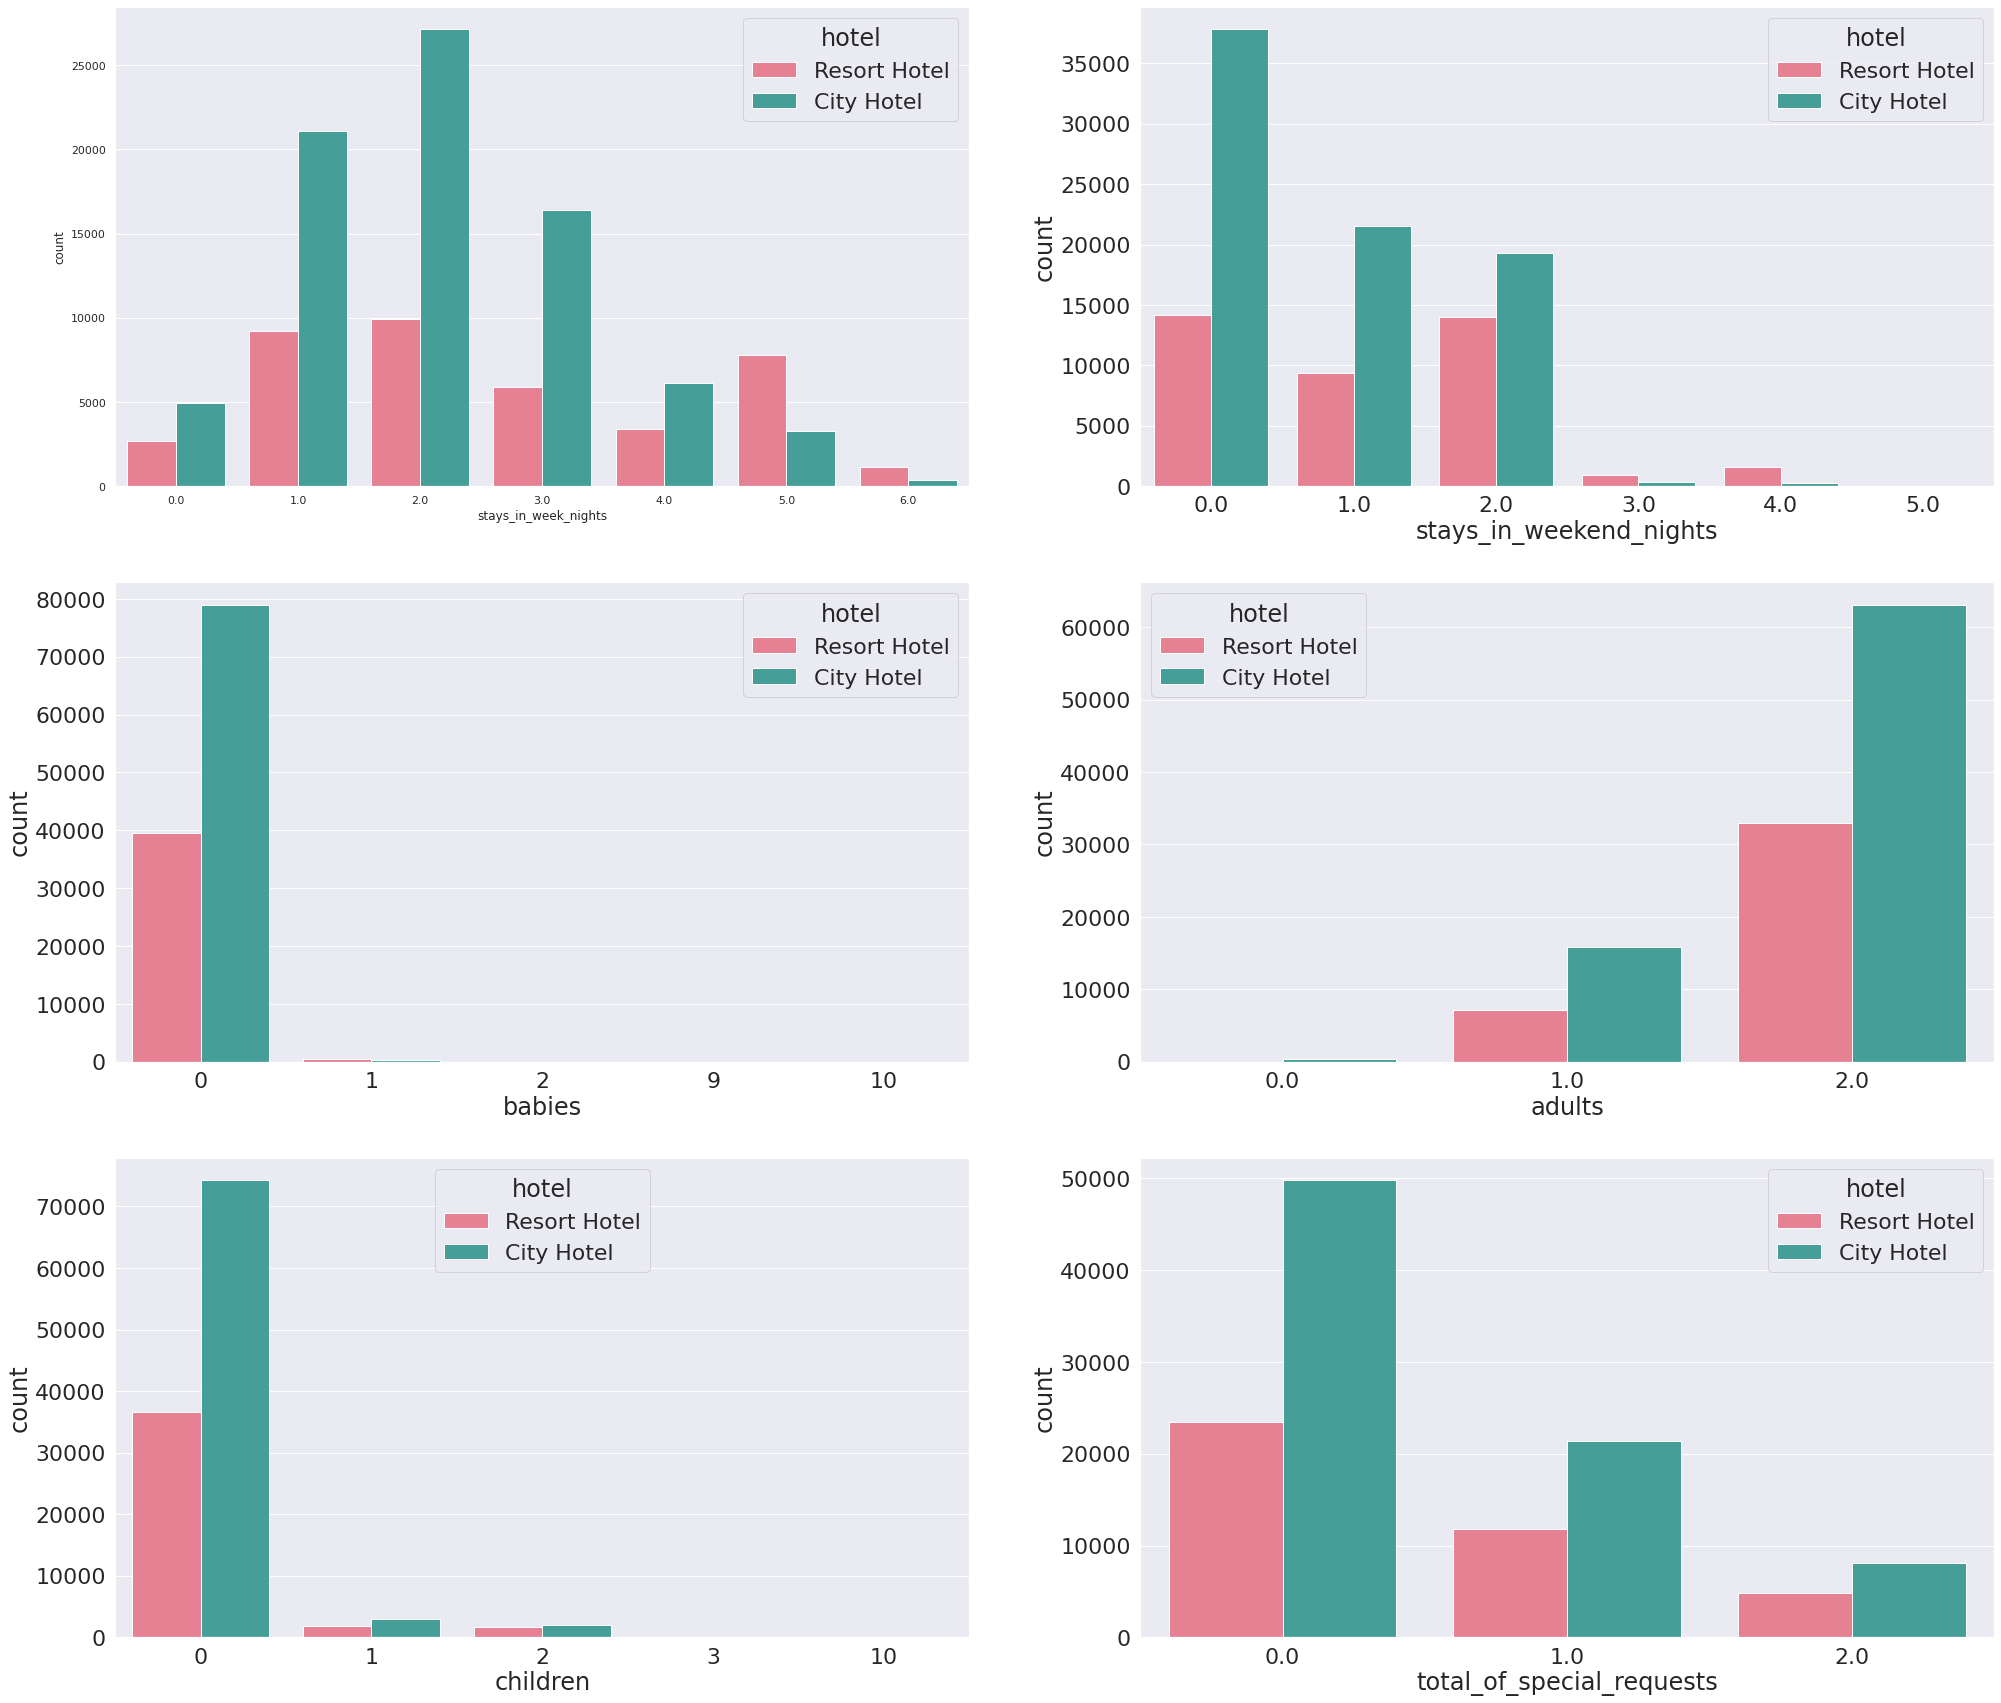

In [ ]:
# From the above distribution plot some of the numerical variables have less unique values
# lets plot the count plot for those numerical variables
lst_count_num = ['stays_in_week_nights','stays_in_weekend_nights','babies','adults','children','total_of_special_requests']
plt.figure(figsize = (30,30))
sns.set_theme()
for i in enumerate(lst_count_num):
    plt.subplot(3, 2,i[0]+1)
    sns.set(font_scale = 2)
    sns.countplot(data = df,x = df[i[1]], hue = 'hotel',palette='husl')

In [ ]:
df.describe().columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

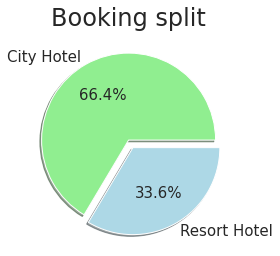

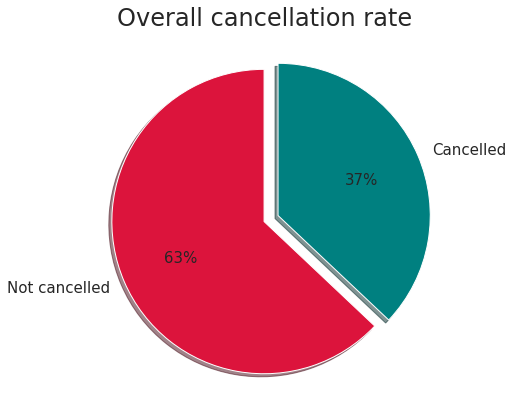

In [ ]:
# Pie Chart representing Bookings 

values= df['hotel'].value_counts().tolist()
labe = df['hotel'].value_counts().index.tolist()
plt.pie(values ,labels=labe , radius=1,explode = [0,0.1],colors=['lightgreen','lightblue'] ,textprops={'fontsize': 15}, autopct='%0.1f%%',shadow=True)
plt.rcParams['figure.figsize']=(9,7)
plt.title('Booking split')
plt.show()

# Pie Chart representing Cancellation
y=df['is_canceled'].value_counts().tolist()
z=['Not cancelled','Cancelled']
plt.pie(y ,labels=z ,explode = [0,0.1],colors=['crimson','teal'],radius=1,startangle=90,textprops={'fontsize': 15}, autopct='%0.0f%%',shadow=True)
plt.title('Overall cancellation rate')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

In [ ]:
# Function to convert month number to month name in temporary table Adr_sum
def month_name(num_month):
  m=['January','February','March','April','May','June','July','August','September','October','November','December']
  n=['01','02','03','04','05','06','07','08','09','10','11','12']
  return(m[n.index(num_month)])

In [ ]:
# Applying function groupby and month_name
adr_sum = df.groupby(['arrival_date_month']).sum('adr').reset_index()
adr_sum['month_name'] = adr_sum['arrival_date_month'].apply(month_name)

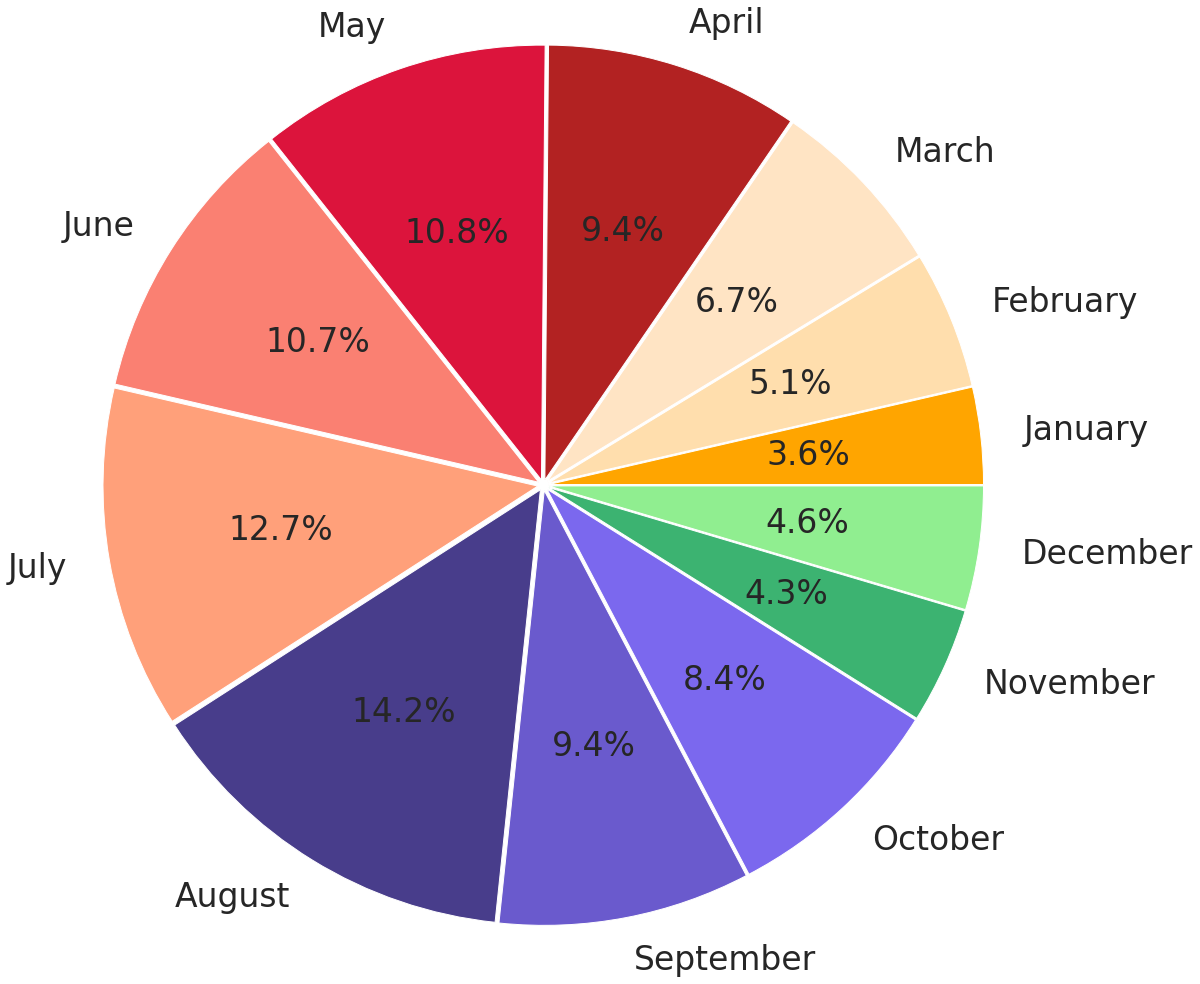

In [ ]:
# importing colors
import matplotlib.colors as mcolors
# Plotting the pie chart
plt.figure(figsize = (10,10))
plt.pie(adr_sum['adr'], labels = adr_sum['month_name'], explode = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025], colors = ['orange','navajowhite','bisque','firebrick','crimson','salmon','lightsalmon','darkslateblue','slateblue','mediumslateblue','mediumseagreen','lightgreen'], radius = 2, textprops = {'fontsize': 33}, autopct = '%0.1f%%' )
# plt.title('Revenue per month', fontsize = 20)
plt.show()

In [ ]:
# y=df['is_canceled'].value_counts().tolist()
# z=['Not cancelled','Cancelled']
# plt.ylabel('Bookings count')
# plt.xlabel('Booking status')
# plt.title('Overall cancellation rate')
# plt.bar(z,y,width=0.5,color=['blue','orange'])
# plt.rcParams['figure.figsize']=(9,7)
# plt.show()

In [ ]:
#Extracting required columns

df_new= df[['hotel','is_canceled']]
dx=df_new.value_counts().tolist()
dy=['City Hotel','Resort Hotel']

#dx=[46228, 33102, 28938, 11122]

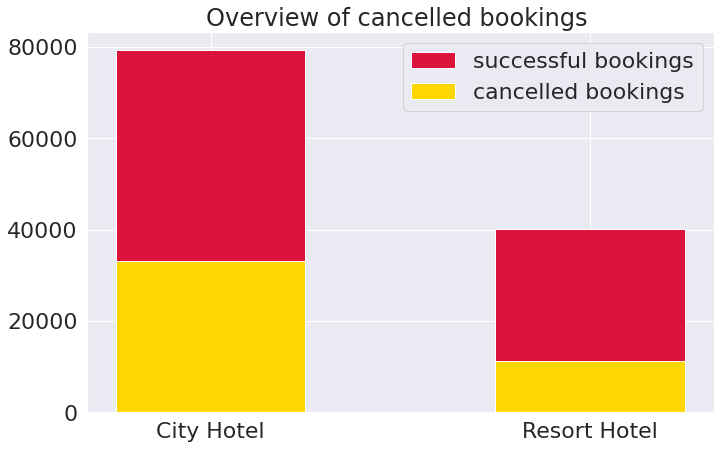

In [ ]:
# Plotting Overview of cancelled bookings with repect to hotel types # Bar graph

width_of_hotel_types =0.5
yy=df['hotel'].value_counts().tolist()
plt.bar(dy,yy,width_of_hotel_types,color = 'crimson',label='successful bookings')
plt.bar(dy,dx[1::2],width_of_hotel_types,color = 'gold',label='cancelled bookings')
plt.title('Overview of cancelled bookings ')
plt.legend()
plt.rcParams['figure.figsize']=(9,7)
plt.show()

City Hotel: 102.9
Resort Hotel: 85.3


Text(0.5, 1.0, 'Revenue per Booking')

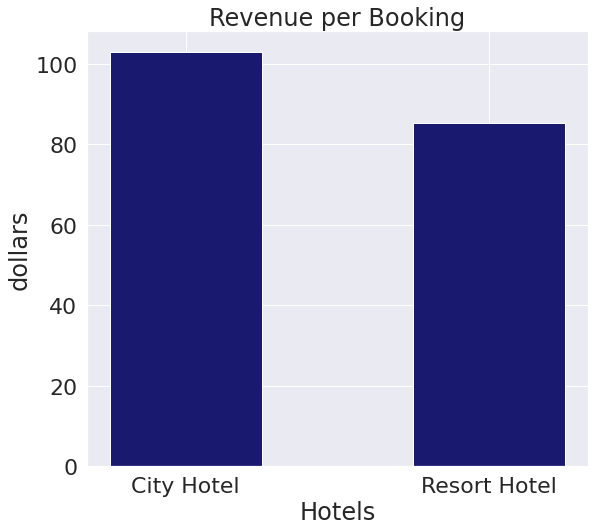

In [ ]:
# Earnings of the hotels per booking

City_hotel_booking, Resort_hotel_booking = df['hotel'].value_counts()
# print('City hotel booking count:',City_hotel_booking)
# print('Resort hotel booking count:',Resort_hotel_booking)

City_hotel_adr = df.groupby('hotel').agg({'adr':'sum'}).reset_index().iloc[0,1]
Resort_hotel_adr = df.groupby('hotel').agg({'adr':'sum'}).reset_index().iloc[1,1]
# print('City hotel total adr:',City_hotel_adr)
# print('Resort hotel total adr:',Resort_hotel_adr)

City_hotel_adr_perbooking = round(City_hotel_adr/City_hotel_booking,1)
Resort_hotel_adr_perbooking = round(Resort_hotel_adr/Resort_hotel_booking,1)
print('City Hotel:',City_hotel_adr_perbooking)
print('Resort Hotel:',Resort_hotel_adr_perbooking)
# Plotting
adr_x = ['City Hotel','Resort Hotel']
adr_y = [City_hotel_adr_perbooking,Resort_hotel_adr_perbooking]
plt.figure(figsize = (8,8))
plt.bar(adr_x,adr_y,color = 'midnightblue',width = 0.5)
plt.xlabel('Hotels')
plt.ylabel('dollars')
plt.title('Revenue per Booking')
# From this we can see that City hotel is earning more than Resort hotel per booking

In [ ]:
# Booking from countries
booking_by_country  = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
booking_by_country.columns = ['Country', 'No of booking']
booking_by_country

In [50]:
def interchange(z):
  if z==0:
    return 1
  else:
    return 0

bb=df.loc[:,['is_canceled','country']]
bb['is_canceled']=bb['is_canceled'].apply(interchange)
cx_country= bb[bb['is_canceled'] == 1].groupby(['country']).sum().reset_index()
cx_country.rename({'is_canceled':'cx_count'},axis=1,inplace=True)

In [51]:
# Importing  Plotly.express to plot a choropleth map
import plotly.express as px

fig=px.choropleth(cx_country, locations = 'country',color= "cx_count", hover_name= "country", scope='world',title="Home country of visitors")
fig.show()

In [52]:
# Europe market without portugal
cc=df.loc[:,['is_canceled','country']]
cc['is_canceled']=cc['is_canceled'].apply(interchange)
dd=cc.groupby(df['country']).sum().sort_values(by='is_canceled',ascending=False).reset_index().query('is_canceled < 10000')
dd.rename({'is_canceled':'cx_count'},axis=1,inplace=True)

In [53]:
# Europe market 
fig=px.choropleth(dd, locations = 'country',color= 'cx_count', hover_name= 'country',scope='europe',title='Home country of visitors')
fig.show()

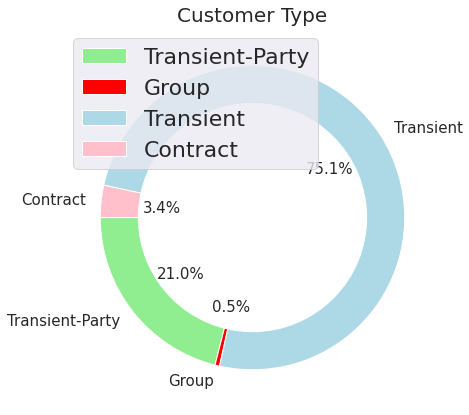

In [55]:
# Plotting customer type using plotly----Pie chart
ee=df.loc[:,['customer_type']].groupby(['customer_type']).size().reset_index()
ee.rename({0:'count'},axis=1,inplace=True)
ff=ee.iloc[[3,1,2,0],[1,0]]

#pie plotting
plt.pie(ff['count']  ,labels=ff['customer_type'],colors=['lightgreen','red','lightblue','pink'],radius=1,startangle=180,textprops={'fontsize': 15},
        autopct='%0.1f%%')
plt.legend(loc='upper left')
plt.title('Customer Type',fontsize = 20)

#donut
cir=plt.Circle(xy=(0,0) , radius=0.75, facecolor='white')
plt.gca().add_artist(cir)
plt.show()

In [56]:
# Function to convert month(string) to numeber(int)

def num_monthx(month_name):
  m=['January','February','March','April','May','June','July','August','September','October','November','December']
  n=[1,2,3,4,5,6,7,8,9,10,11,12]
  return(n[m.index(month_name)])

In [ ]:
# Importing  Plotly.express to plot a choropleth map
import plotly.express as px

fig=px.choropleth(cx_country, locations = 'country',color= "cx_count", hover_name= "country",scope='world',title="Home country of visitors")
fig.show()

In [ ]:
# Europe market without portugal
cc=df.loc[:,['is_canceled','country']]
cc['is_canceled']=cc['is_canceled'].apply(interchange)
dd=cc.groupby(df['country']).sum().sort_values(by='is_canceled',ascending=False).reset_index().query('is_canceled < 10000')
dd.rename({'is_canceled':'cx_count'},axis=1,inplace=True)


In [ ]:
# Europe market 
fig=px.choropleth(dd, locations = 'country',color= 'cx_count', hover_name= 'country',scope='europe',title='Home country of visitors')
fig.show()